In [21]:
import numpy 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [22]:
all_df = pd.read_csv("data/weather.csv")

In [23]:
all_df=all_df.drop(['RISK_MM'], axis=1)

In [24]:
X=all_df.drop(['RainTomorrow'], axis=1).values.astype('float64')

In [25]:
Y = all_df['RainTomorrow'].values.astype('int64')

In [26]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

95672

In [27]:
test_Features[:2]

array([[-0.28057235, -0.88540995, -0.15604664,  0.58549966,  0.29969181,
         0.56686938,  0.71671696,  0.24811193, -0.16280797,  0.27738035,
        -0.47846775, -0.9189042 , -0.53271769],
       [ 0.74023477, -0.34150784, -0.274179  ,  0.43712836,  1.89126836,
         1.3737581 , -0.06742478,  1.02136889, -0.43047181, -0.40644069,
         0.40533611, -0.21640785, -0.53271769]])

In [28]:
train_Label[:4]

array([1, 1, 0, 1])

In [29]:
train_Features.shape

(95672, 13)

In [30]:
test_Label[:4]

array([1, 0, 0, 0])

In [31]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [32]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [33]:
from keras.utils import np_utils
train_Label = train_Label.reshape(train_Label.shape[0], 1)
test_Label= test_Label.reshape(test_Label.shape[0], 1)
train_Label=np_utils.to_categorical(train_Label)
test_Label=np_utils.to_categorical(test_Label)

In [34]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [35]:
model = Sequential()

In [36]:
model.add(LSTM(units=26, input_shape=(13,1)))

In [37]:
model.add(Dense(2, activation = "sigmoid"))

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 26)                2912      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 54        
Total params: 2,966
Trainable params: 2,966
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [40]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=60, 
                         batch_size=1500,verbose=1,callbacks=[early_stopping])

Train on 76537 samples, validate on 19135 samples
Epoch 1/60
76537/76537 [==============================] - 12s 161us/step - loss: 0.6160 - acc: 0.7450 - val_loss: 0.5043 - val_acc: 0.7798
Epoch 2/60
76537/76537 [==============================] - 10s 131us/step - loss: 0.4891 - acc: 0.7841 - val_loss: 0.4803 - val_acc: 0.7829
Epoch 3/60
76537/76537 [==============================] - 10s 131us/step - loss: 0.4633 - acc: 0.7863 - val_loss: 0.4553 - val_acc: 0.7884
Epoch 4/60
76537/76537 [==============================] - 13s 175us/step - loss: 0.4435 - acc: 0.7934 - val_loss: 0.4400 - val_acc: 0.7942
Epoch 5/60
76537/76537 [==============================] - 9s 111us/step - loss: 0.4290 - acc: 0.8018 - val_loss: 0.4261 - val_acc: 0.8082
Epoch 6/60
76537/76537 [==============================] - 8s 107us/step - loss: 0.4159 - acc: 0.8169 - val_loss: 0.4142 - val_acc: 0.8181
Epoch 7/60
76537/76537 [==============================] - 9s 120us/step - loss: 0.4037 - acc: 0.8251 - val_loss: 0.403

In [41]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

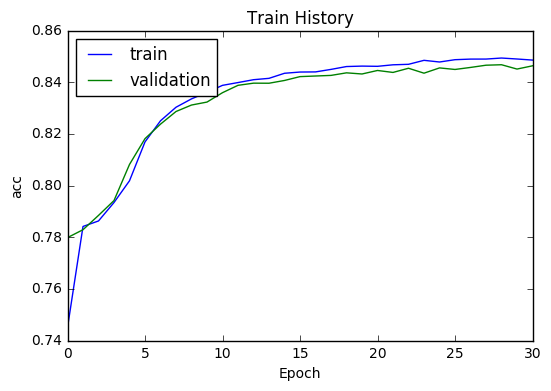

In [42]:
show_train_history(train_history,'acc','val_acc')

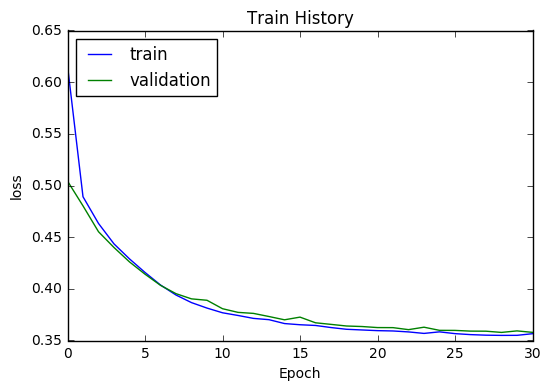

In [43]:
show_train_history(train_history,'loss','val_loss')

In [44]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

23918/23918 [==============================] - 7s 273us/step


In [45]:
scores[1]

0.848565933616457